Analysing Axelbib Database (SQLite3) with Pandas
========================================

The main ideas behind this work was taken from Vik Paruchuri's blog: see here (https://www.dataquest.io/blog/python-pandas-databases/).
This notebook covers the analysis of my database Axelbib. A database containing information on various research papers and journals done
for the Prsoner's Dilemma. The database was constructed using Django frame work.

This notebook has the following structure:
    - read the tables from my db.sqlite3 
    - initial analysis

    
**Tips from myself**
- All the analysis done on Axelbib, even if it started in an individual notebook should end up in here with documentation.
- In case the names of tables are forgotten, use the following command on the django shell (model_instance._meta.db_table)


**Different ways of getting objects**

Here are examples of different ways one can access the objects in the db. Because of the size of Axelbib they are not being used as they are insufficient.


    >>> con = sqlite3.connect("db.sqlite3") # making a connection with the db
    >>> cur = con.cursor()                  # set cursor
    >>> cur.execute("select * from library_article limit 1;")
    >>> results = cur.fetchall()
    >>> titles = cur.execute(""" select title from library_article;""").fetchall()
    >>> cur.close()
    >>> con.close()

Glossary
--------

Cursor: allow to execute SQL queries against a database

In [1]:
import pandas as pd
import sqlite3

Reading the db in pandas
------------------------

In [2]:
conn = sqlite3.connect("db.sqlite3")                             # making a connection with the db
cur = conn.cursor()                                               # set cursor

In [3]:
# authors
authors = pd.read_sql_query("""SELECT library_article.id, title, library_author.name FROM library_article
                                LEFT OUTER JOIN library_article_author
                                ON library_article.id = library_article_author.article_id 
                                LEFT OUTER JOIN library_author
                                ON library_author.id= library_article_author.author_id""", conn)
authors.columns

Index(['id', 'title', 'name'], dtype='object')

In [4]:
# labels
labels = pd.read_sql_query("""SELECT library_article.id, title, library_label.label FROM library_article
                                LEFT OUTER JOIN library_article_labels
                                ON library_article.id = library_article_labels.article_id 
                                LEFT OUTER JOIN library_label
                                ON library_label.id= library_article_labels.label_id""", conn)#
labels.columns

Index(['id', 'title', 'label'], dtype='object')

In [5]:
# the rest
db = pd.read_sql_query(""" SELECT library_article.id, title, key, year from library_year
                               JOIN library_article 
                               WHERE library_article.date_id = library_year.id""", conn)
db.columns

Index(['id', 'title', 'key', 'year'], dtype='object')

In [46]:
db.head(3)

,id,title,key,year
0,1,Effective Choice in the Prisoner's Dilemma,Axelrod1980a,1980
1,2,Fingerprinting: Visualization and automatic an...,Ashlock2008,2008
2,3,More Effective Choice in the Prisoner's Dilemma,Axelrod1980b,1980


In [47]:
cur.close()
conn.close()

Initial Analysis
----------------

In [6]:
# frenquency bars
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


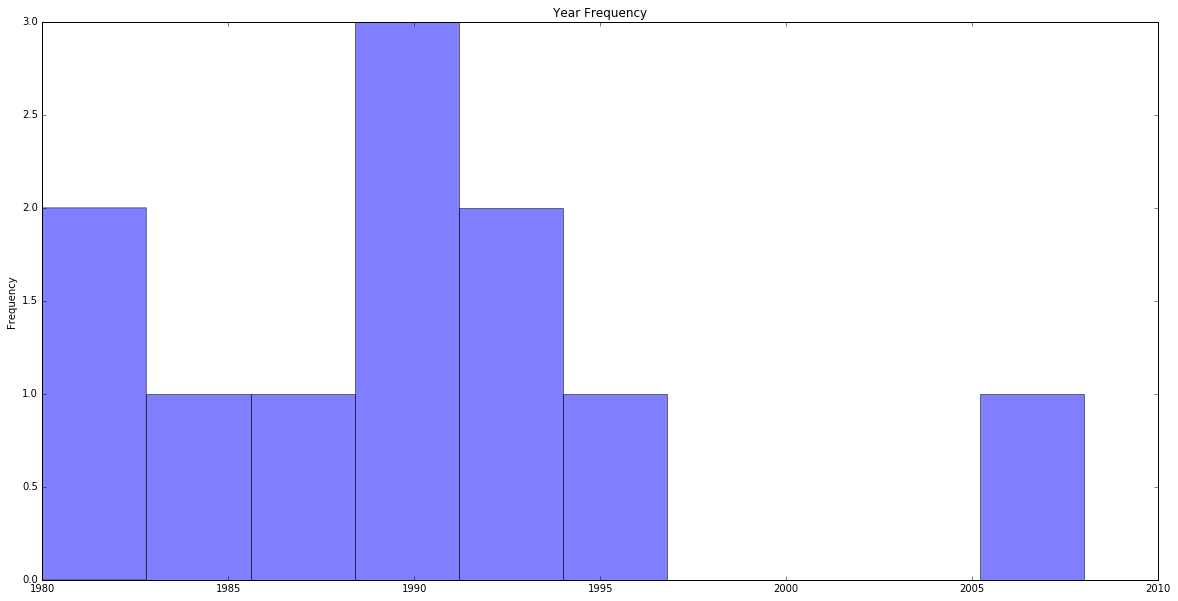

In [7]:
plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Year Frequency")
db['year'].plot.hist(alpha=0.5)

([<matplotlib.axis.XTick at 0x7fa9e8b88d30>,
 <a list of 15 Text xticklabel objects>)

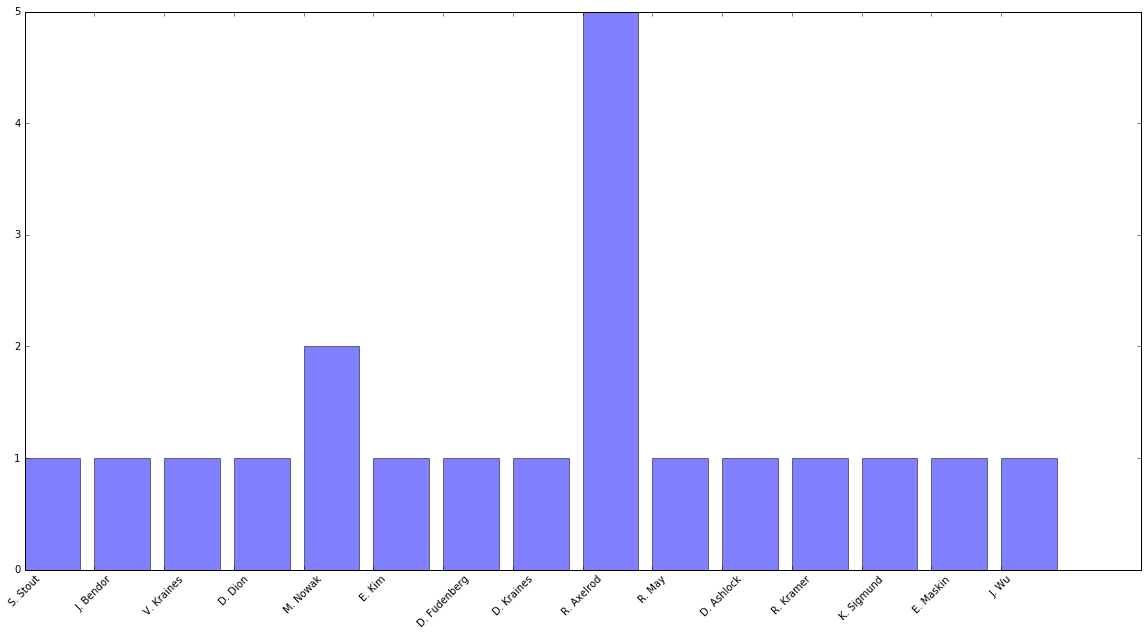

In [8]:
counter = Counter(authors['name'])
author_names = counter.keys()
author_counts = counter.values()

indexes = np.arange(len(author_names))
fig = figure(figsize=(20, 10))
plt.bar(indexes, author_counts, alpha=0.5)
plt.xticks(indexes, author_names, rotation=45)